<a href="https://colab.research.google.com/github/danielcti/data-science-project/blob/colabIgor/dataVisualizationNetflixp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas que julgamos necessárias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import *

In [ ]:
df = pd.read_csv("netflix_titles.csv")
print('Setup Complete')

Setup Complete


#Primeiramente vamos ver o que temos nos nossos dados carregados, para assim possibilitar nossa análise descritiva

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


Agora iremos ver o tamanho dos nossos dados:

In [ ]:
df.shape

(7787, 12)

Podemos ver que temos 12 atributos com 7787 instâncias 

### Podemos também ver que nossos dados já estão separados entre séries(*TV Show*) e filmes (*Movie*). Então, até o momento, não precisamos aplicar nenhuma função para definir entre séries e filmes.

#Agora, dando início ao nosso pré-processamento dos dados






### Vamos agora tratar nossas instâncias, primeiramente verificando caso tenhamos dados ausentes. Caso positivo iremos tratá-los da maneira cabível, seja excluindo, substituindo, ou alterando da melhor maneira possível.

In [ ]:
df.isnull().sum()/(len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

Primeiramente veremos quais as instâncias de *types* para que possamos facilitar nosso tratamento para *director* que possuem 30% de dados ausentes.

In [ ]:
df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

Como só temos duas instâncias de *type*, obsevadas logo acima e que, além disso, sabemos que em 'TV Show' os diretores variam por episódio fazendo sentido não serem guardados tais dados. Dessa forma, iremos dividir em dois datasets, dfMovie e dfShow, para checar se essa suposição de fato se prova verdadeira.

In [ ]:
dfMovie = df[(df.type == 'Movie')]
dfShow = df[(df.type == 'TV Show')]

In [ ]:
dfShow.isnull().sum()/(len(dfShow))*100

show_id          0.000000
type             0.000000
title            0.000000
director        92.365145
cast            12.116183
country         11.493776
date_added       0.414938
release_year     0.000000
rating           0.082988
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
dfMovie.isnull().sum()/(len(dfMovie))*100

show_id         0.000000
type            0.000000
title           0.000000
director        3.031430
cast            7.922633
country         4.277478
date_added      0.000000
release_year    0.000000
rating          0.092989
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

De fato, nossa suposição se tornou em partes verdadeira, visto que a feature *director* apresentou 92% de dados ausentes para dfShow e apenas 3% para dfMovie.
> Tendo isso em vista, poderíamos trabalhar com dois datasets onde vamos excluir o atributo em dfShows e apenas substituí-los em dfMovies ou substituir todos os valores ausentes por 'desconhecido'.


vamos seguir com a segunda opção por enquanto

In [ ]:
df['director']=df['director'].fillna('desconhecido')

Agora com relação ao atributo cast, iremos tratar da mesma forma que *director*

In [ ]:
df['cast']=df['cast'].fillna('desconhecido')

Com relação a *country* vamos substituir pela moda, assim como em *date_added*

In [ ]:
df['country']=df['country'].fillna(df['country'].mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])

In [ ]:
df.isnull().sum()/(len(df))*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

Como podemos ver, todos os dados ausentes foram tratados. Lembrando que poderíamos tê-los tratados com algoritmos como KNN ou Árvore de decisão, porém como temos atributos compostos por listas achamos melhor apenas utilizar os métodos apresentatos acima.

## Realizando agora a definição de tipos, vamos primeiro analisá-los para podermos decidir quais ações tomar

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

###Como pudemos notar ao mostrar o nosso dataset inicialmente o campo *country* é composto de uma lista de países, porém será mais prático trabalhar apenas com o país principal, que neste caso consideramos o primeiro da lista. Então iremos adicionar a coluna *main_country* ao data frame.

In [ ]:
df['main_country']=df['country'].apply(lambda x: x.split(",")[0])
df['main_country']

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
7782            Sweden
7783             India
7784     United States
7785         Australia
7786    United Kingdom
Name: main_country, Length: 7787, dtype: object

### Com relação a *duration*, teremos que tratar o nosso dataset para tirar 'min' de *type*=='Movie' e 'Season' de *type*=='TV Show'. Além disso teremos que alterar o tipo dos nossos atributos para int64.

In [ ]:
df['duration'] = df.duration.apply(lambda x: x.split()[0])
dfMovie['duration'] = dfMovie.duration.apply(lambda x: x.split()[0])
dfShow['duration'] = dfShow.duration.apply(lambda x: x.split()[0])

In [ ]:
df['duration'] = df.duration.astype('int')
dfMovie['duration'] = dfMovie.duration.astype('int')
dfShow['duration'] = dfShow.duration.astype('int')



### Vamos tratar como variáveis categóricas todas as features com exceção de *date_added*, *release_year*, *duration* e *show_id* e as que temos listas como valores.

In [ ]:
df['main_country']=df['main_country'].astype('category')
df['director']=df['director'].astype('category')
df['listed_in']=df['listed_in'].astype('category')
df['type']=df['type'].astype('category')
df['title']=df['title'].astype('category')
df['rating']=df['rating'].astype('category')

### Agora iremos tratar do nosso atributo *date_added*

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

Vamos utilizar apenas o ano em que foi adicionado o título à netflix criando uma nova feature chamada *year_added*

In [ ]:
df.date_added.head()

0   2020-08-14
1   2016-12-23
2   2018-12-20
3   2017-11-16
4   2020-01-01
Name: date_added, dtype: datetime64[ns]

In [ ]:

df['year_added'] = df.date_added.apply(lambda x: x.strftime('%Y-%m-%d'))

In [ ]:
df['year_added'] = df.year_added.apply(lambda x: x[:4])

In [ ]:
df['year_added'] = df.year_added.astype('int')

In [ ]:
df.dtypes

show_id                 object
type                  category
title                 category
director              category
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                category
duration                 int64
listed_in             category
description             object
main_country          category
year_added               int64
dtype: object

## Normalizando utilizando o z-score para o ano que foi liberada na netflix e durações de filmes e utilizando o minmax para séries 
> Isso será útil para treinar o nosso modelo posteriormente.(lembrando que estaremos serparando as temporadas e os minutos com os datasets dfShow e dfMovie)

In [ ]:
scaler = StandardScaler()
dfMovie['release_year_norm'] = scaler.fit_transform(dfMovie[['release_year']])
dfMovie['release_year_norm'].describe()

count    5.377000e+03
mean    -6.347577e-15
std      1.000093e+00
min     -7.339807e+00
25%     -9.521768e-02
50%      3.187589e-01
75%      5.257471e-01
max      8.362295e-01
Name: release_year_norm, dtype: float64

In [ ]:
dfMovie['duration_norm'] = scaler.fit_transform(dfMovie[['duration']])
dfMovie['duration_norm'].describe()

count    5.377000e+03
mean     9.630054e-17
std      1.000093e+00
min     -3.375884e+00
25%     -4.664846e-01
50%     -4.584857e-02
75%      5.149995e-01
max      7.455494e+00
Name: duration_norm, dtype: float64

In [ ]:
minmax_scaler = MinMaxScaler()
dfShow['release_year_norm'] = minmax_scaler.fit_transform(dfShow[['release_year']])
dfShow['release_year_norm'].describe()

count    2410.000000
mean        0.949914
std         0.059009
min         0.000000
25%         0.937500
50%         0.968750
75%         0.979167
max         1.000000
Name: release_year_norm, dtype: float64

In [ ]:
dfShow['duration_norm'] = minmax_scaler.fit_transform(dfShow[['duration']])
dfShow['duration_norm'].describe()

count    2410.000000
mean        0.051729
std         0.106424
min         0.000000
25%         0.000000
50%         0.000000
75%         0.066667
max         1.000000
Name: duration_norm, dtype: float64

### Discretizando em intervalos iguais as features *duration* e *release_year* do dataset de filme temos:

In [ ]:
dfMovie['duration_dist'] = pd.qcut(dfMovie['duration'],4)
dfMovie['duration_dist'].describe()

count              5377
unique                4
top       (2.999, 86.0]
freq               1377
Name: duration_dist, dtype: object

In [ ]:
dfMovie['release_year_dist'] = pd.qcut(dfMovie['release_year'],4)
dfMovie['release_year_dist'].describe()

count                 5377
unique                   4
top       (2016.0, 2018.0]
freq                  1478
Name: release_year_dist, dtype: object

In [ ]:
dfMovie['duration_dist'].value_counts()

(2.999, 86.0]     1377
(86.0, 98.0]      1368
(114.0, 312.0]    1331
(98.0, 114.0]     1301
Name: duration_dist, dtype: int64

In [ ]:
dfMovie['release_year_dist'].value_counts()

(2016.0, 2018.0]      1478
(2012.0, 2016.0]      1470
(1941.999, 2012.0]    1424
(2018.0, 2021.0]      1005
Name: release_year_dist, dtype: int64

## Agora iremos fazer a limpeza dos nossos dados 

> ### Primeiro checando se temos dados duplicados

In [ ]:
len(df)

7787

In [ ]:
df.drop_duplicates(keep = False, inplace = True)

In [ ]:
len(df)

7787

Como podemos ver não temos nenhum dado exatamente igual em nosso dataset

### Removendo outliers através do método tukey(univariado) nos atributos de *duration* para filmes 

Primeiramente vemos a descrição de *duration*

In [ ]:
dfMovie.duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

Vendo graficamente

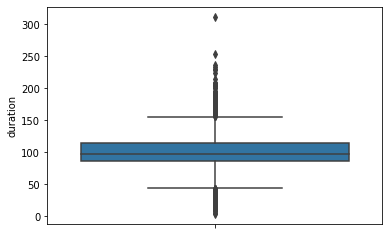

In [ ]:
sns.boxplot(y=dfMovie.duration)

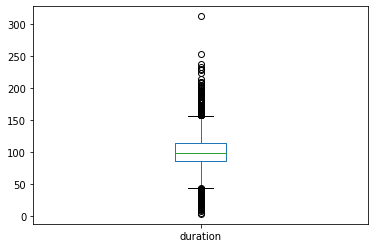

In [ ]:
dfMovie['duration'].plot.box()

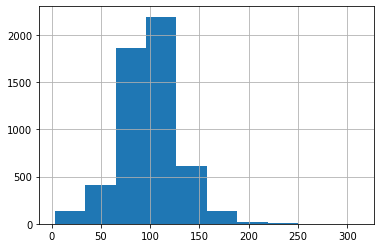

In [ ]:
dfMovie.duration.hist()

Como já normalizamos a distribuição de *duration* vamos utilizá-la para dar continuidade.

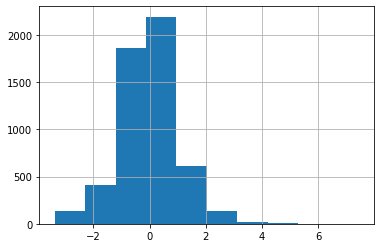

In [ ]:
dfMovie.duration_norm.hist()

Calculando o IQR, já que outliers são identificados fora dos limites inferiores e superiores dados por Q1 - 1.5IQR e Q3 + 1.5IQR respectivamente.

In [ ]:
q1 = dfMovie['duration_norm'].quantile(q=0.25)
q3 = dfMovie['duration_norm'].quantile(q=0.75)
iqr = q3 - q1
iqr

0.9814840367357893

Teremos o seguinte dataset retirando outliers de acordo com o método de tukey

In [ ]:
dfMovie1 = dfMovie[(dfMovie['duration_norm'] > (q1-1.5*iqr)) & (dfMovie['duration_norm'] < (q3+1.5*iqr))]
len(dfMovie1)

5012

In [ ]:
dfMovie1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_norm,duration_norm,duration_dist,release_year_dist
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0.318759,-0.221114,"(86.0, 98.0]","(2012.0, 2016.0]"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",-0.198712,-0.746909,"(2.999, 86.0]","(1941.999, 2012.0]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",-0.405700,-0.676803,"(2.999, 86.0]","(1941.999, 2012.0]"
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,-0.509194,0.830476,"(114.0, 312.0]","(1941.999, 2012.0]"
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",0.629241,-0.151008,"(86.0, 98.0]","(2018.0, 2021.0]"


### Vamos tentar remover agora utilizando duas variáveis, sendo elas duration e release_year

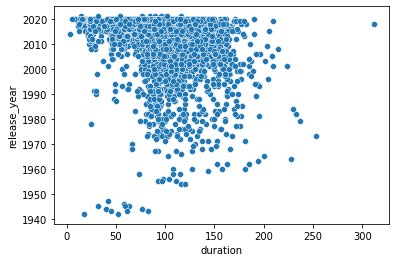

In [ ]:
sns.scatterplot(x="duration", y='release_year', data=dfMovie)

In [ ]:
dfMovie['duration_year'] = dfMovie['duration'] / dfMovie['release_year']

In [ ]:
dfMovie['duration_year'].describe()

count    5377.000000
mean        0.049350
std         0.014246
min         0.001490
25%         0.042680
50%         0.048611
75%         0.056688
max         0.154609
Name: duration_year, dtype: float64

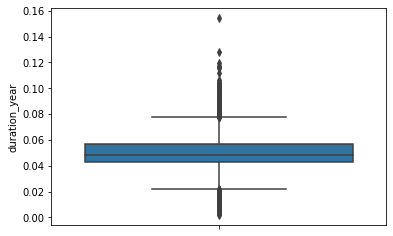

In [ ]:
sns.boxplot(y=dfMovie.duration_year)

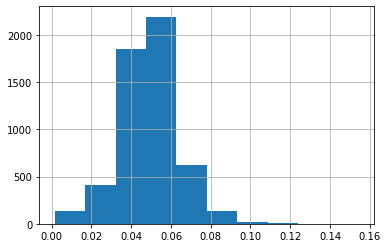

In [ ]:
dfMovie['duration_year'].hist()

Normalizando, apesar de já seguirmos uma distribuição parecida com a gaussiana

In [ ]:
scaler = StandardScaler()
dfMovie['duration_year_norm'] = scaler.fit_transform(dfMovie[['duration_year']])
dfMovie['duration_year_norm'].describe()

count    5.377000e+03
mean     2.585083e-16
std      1.000093e+00
min     -3.359925e+00
25%     -4.682861e-01
50%     -5.190399e-02
75%      5.151239e-01
max      7.389314e+00
Name: duration_year_norm, dtype: float64

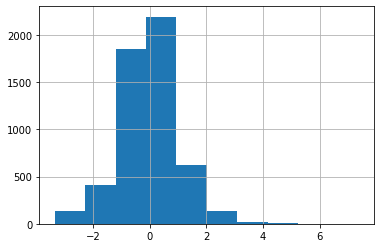

In [ ]:
dfMovie['duration_year_norm'].hist()

In [ ]:
mad = abs(dfMovie['duration_year_norm'] - dfMovie['duration_year_norm'].median()).median()*(1/0.6745)

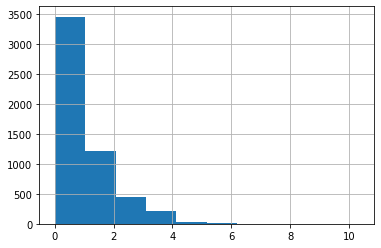

In [ ]:
(abs(dfMovie['duration_year_norm']-dfMovie['duration_year_norm'].median())/mad).hist()

In [ ]:
dfMovie2 = dfMovie[abs(dfMovie['duration_year_norm']-dfMovie['duration_year_norm'].median())/mad < 4.5]
print(len(dfMovie2))

5352


Comparando os dois métodos, retiramos mais dados utilizando apenas uma variável

#Analisando nossas estatísticas univariadas a 'TV Show' e a 'Movie'.






In [ ]:
df[df['type']=='TV Show']['duration'].describe()

count    2410.000000
mean        1.775934
std         1.596359
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: duration, dtype: float64

In [ ]:
df[df['type']=='Movie']['duration'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

Podemos ver que temos um filme com duração de 3 minutos, vamos ver melhor que filme é esse.

In [ ]:
df.loc[(df['duration'] < 10) & (df['type'] == 'Movie')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,main_country,year_added
1203,s1204,Movie,Canvas,Frank E. Abney III,desconhecido,United States,2020-12-11,2020,G,9,"Children & Family Movies, Dramas","After a heartbreaking loss, a grandfather stru...",United States,2020
1501,s1502,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,2020-12-28,2020,PG-13,8,Dramas,Animation and activism unite in this multimedi...,United States,2020
5605,s5606,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",desconhecido,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",United States,2019
5694,s5695,Movie,Sol Levante,Akira Saitoh,desconhecido,Japan,2020-04-02,2020,TV-14,5,"Action & Adventure, Anime Features, Internatio...",A young warrior and her familiar search for th...,Japan,2020


Dessa forma temos a confirmação de que nosso dataset contém curtas, que também são considerados filmes.

* Veremos também agora as estatísticas univariadas para os anos de lançamento

In [ ]:
df['release_year'].describe()

count    7787.000000
mean     2013.932580
std         8.757395
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

# Analisando agora estatísticas bivariadas teremos:

In [ ]:
df[df.type=='Movie'].corr(method='spearman')

,release_year,duration,year_added
release_year,1.000000,-0.210483,0.224301
duration,-0.210483,1.000000,0.138488
year_added,0.224301,0.138488,1.000000


dessa forma podemos notar que conforme o tempo foi passando a duração dos filmes foi diminuindo

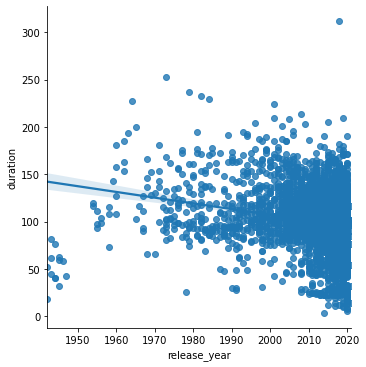

In [ ]:
sns.lmplot(x="release_year", y='duration', data=dfMovie)


Podemos ver que conforme o tempo passa os filmes vem ficando mais curtos, confirmando graficamente o que foi observado

# Realizando agora uma análise descritiva dos nossos dados

### Comparando as quantidades de filmes e de TV Shows

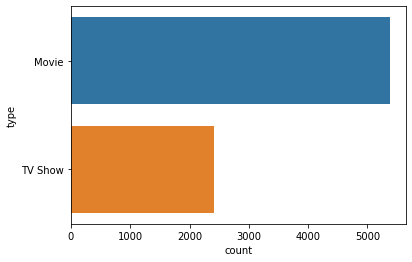

In [ ]:
sns.countplot(y="type",data=df)

### Comparando por ano de lançamento de filme

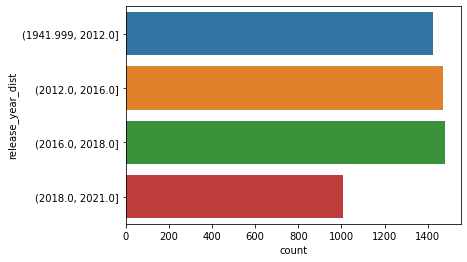

In [ ]:
sns.countplot(y="release_year_dist",data=dfMovie)

Podemos ver aqui que temos a maioria dos filmes na netflix foram lançados entre 2016 e 2018

### Agora vamos analisar a distribuição de adição de títulos à netflix ao longo dos anos

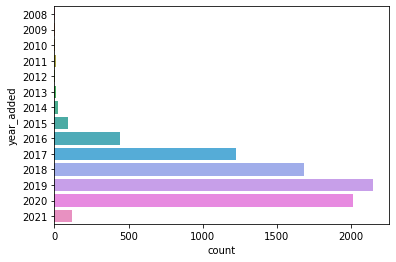

In [ ]:
sns.countplot(y="year_added",data=df)

Aqui podemos ver que o ano que a netflix mais adicionou títulos foi em 2019

### Analisando as classificações indicativas de séries e filmes, respectivamente.

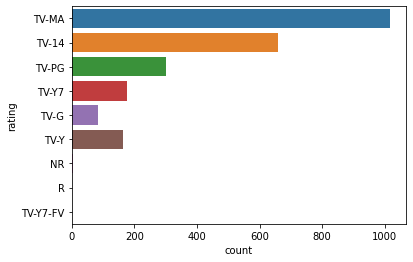

In [ ]:
sns.countplot(y="rating",data=dfShow)

Podemos ver que não temos nenhuma série para maior de idade no nosso conjunto de dados

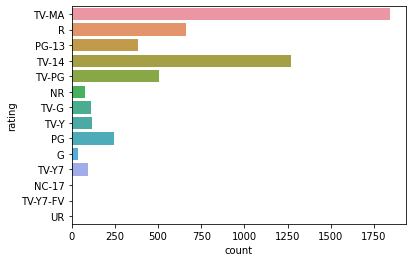

In [ ]:
sns.countplot(y="rating",data=dfMovie)

Podemos ver aqui que temos filmes para praticamente todas as idades na netflix

### Vendo agora a distribuição da duração dos nossos filmes/curtas temos o seguinte histograma

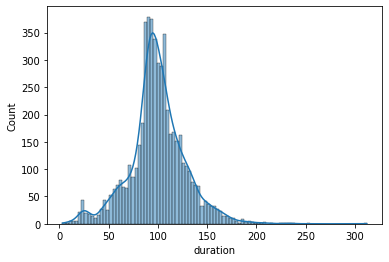

In [ ]:
sns.histplot(data=dfMovie['duration'],  kde=True)

### Agora por países

In [ ]:
#sns.countplot(y='main_country',data=df)

In [ ]:
df_country_counts = df['main_country'].value_counts(ascending=False).to_frame()
df_country_counts = df_country_counts.reset_index()
df_country_counts.columns = ['unique_values', 'counts for main_country']
df_top_ten = df_country_counts[:10]
df_top_ten

,unique_values,counts for main_country
0,United States,3390
1,India,956
2,United Kingdom,577
3,Canada,259
4,Japan,237
5,France,196
6,South Korea,194
7,Spain,168
8,Mexico,123
9,Australia,108


# Carregando dois novos datasets de [IMDB](https://www.imdb.com/interfaces/). Um contendo os títulos de filmes e séries e outro contendo avaliações dadas por espectadores

In [ ]:
dfTitles = pd.read_csv("data.tsv", sep='\t')
dfNotas = pd.read_csv("notas.tsv", sep='\t')

In [ ]:
dfTitles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
dfTitles.tail(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8084304,tt9916838,tvEpisode,Episode #3.13,Episode #3.13,0,2010,\N,\N,"Action,Drama,Family"
8084305,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,\N,11,"Animation,Comedy,Family"
8084306,tt9916842,tvEpisode,Episode #3.16,Episode #3.16,0,2010,\N,\N,"Action,Drama,Family"
8084307,tt9916844,tvEpisode,Episode #3.15,Episode #3.15,0,2010,\N,\N,"Action,Drama,Family"
8084308,tt9916846,tvEpisode,Episode #3.18,Episode #3.18,0,2010,\N,\N,"Action,Drama,Family"
8084309,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8084310,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8084311,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8084312,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
8084313,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Animation,Comedy,Family"


In [ ]:
dfNotas.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1722
1,tt0000002,6.0,211
2,tt0000003,6.5,1484
3,tt0000004,6.1,124
4,tt0000005,6.2,2286


In [ ]:
dfNotas.tail(10)

,tconst,averageRating,numVotes
1171910,tt9916544,7.1,40
1171911,tt9916576,5.9,13
1171912,tt9916578,8.0,26
1171913,tt9916580,7.7,6
1171914,tt9916628,8.6,5
1171915,tt9916682,5.6,5
1171916,tt9916690,6.6,5
1171917,tt9916720,5.5,110
1171918,tt9916766,6.9,18
1171919,tt9916778,7.5,30


In [ ]:
dfTitles.shape

(8084314, 9)

In [ ]:
dfNotas.shape

(1171920, 3)

Podemos ver que nossos dados não são iguais, então teremos que comparar *tconst* antes de unir os datasets

#Unindo 3 datasets

## Unindo primeiramente os datasets de notas e títulos já que ambos estão separados através do inner join que resulta no dataset df_inner apenas com a interseção de tconst de dfNotas e dfTitles

In [ ]:
df_inner = pd.merge(dfNotas, dfTitles, on='tconst', how='inner')

df_inner

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1722,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,6.0,211,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1484,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.1,124,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,6.2,2286,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1171915,tt9916682,5.6,5,tvEpisode,Horrid Henry It's all Your Fault,Horrid Henry It's all Your Fault,0,2012,\N,10,"Animation,Comedy,Family"
1171916,tt9916690,6.6,5,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,10,"Animation,Comedy,Family"
1171917,tt9916720,5.5,110,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery"
1171918,tt9916766,6.9,18,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV"


## Agora iremos fazer a mesma coisa para df_inner com os atributos *'averageRating'*, *'numVotes'* e *'primaryTitle'* com o nosso dataset original que teve realizado seu pre-processamento gerando juntaTD

In [ ]:
juntaTD = pd.merge(df_inner.loc[:,['averageRating', 'numVotes','primaryTitle']], df, left_on='primaryTitle', right_on='title', how='inner')

Analisando a forma do dataset gerado

In [ ]:
juntaTD.shape

(23032, 17)

### Vamos remover as duplicatas utilizando o atributo título como verificador 

In [ ]:
juntaTD.drop_duplicates(subset =['primaryTitle'], keep = False, inplace = True)
juntaTD.head(10)

,averageRating,numVotes,primaryTitle,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,main_country,year_added
2779,6.4,80210,Kate & Leopold,s3315,Movie,Kate & Leopold,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",United States,2020-01-01,2001,PG-13,118,"Comedies, Romantic Movies",A present-day woman takes responsibility for g...,United States,2020
2822,6.7,2093,San Pietro,s5372,Movie,San Pietro,John Huston,desconhecido,United States,2017-03-31,1945,TV-14,32,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley...",United States,2017
2869,6.7,546,Tunisian Victory,s7269,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom",2017-03-31,1944,TV-14,76,"Classic Movies, Documentaries",British and American troops join forces to lib...,United States,2017
3629,6.5,1371,The Sign of Venus,s6869,Movie,The Sign of Venus,Dino Risi,"Sophia Loren, Franca Valeri, Vittorio De Sica,...",Italy,2020-11-13,1955,TV-14,97,"Classic Movies, Comedies, Independent Movies","While suitors swoon over her cousin, a single ...",Italy,2020
3867,6.4,96,This Is My Love,s7050,TV Show,This Is My Love,desconhecido,"Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Su...",South Korea,2017-05-22,2015,TV-14,1,"International TV Shows, Korean TV Shows, Roman...",A renowned actor who is still pining over the ...,South Korea,2017
3981,6.5,2121,Scandal in Sorrento,s5426,Movie,Scandal in Sorrento,Dino Risi,"Vittorio De Sica, Sophia Loren, Lea Padovani, ...","Italy, France",2020-11-13,1955,TV-PG,93,"Classic Movies, Comedies, Independent Movies","When a marshal moves back to his hometown, he ...",Italy,2020
3990,7.6,3807,Cairo Station,s1170,Movie,Cairo Station,Youssef Chahine,"Farid Shawqy, Hind Rostom, Youssef Chahine, Ha...",Egypt,2020-06-18,1958,TV-14,73,"Classic Movies, Dramas, International Movies",A Cairo newsstand vendor's fantasies morph int...,Egypt,2020
4166,8.3,12805,The Andy Griffith Show,s6083,TV Show,The Andy Griffith Show,desconhecido,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,2017-07-01,1967,TV-G,8,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...,United States,2017
4227,7.4,436,Jis Desh Men Ganga Behti Hai,s3188,Movie,Jis Desh Men Ganga Behti Hai,Radhu Karmakar,"Raj Kapoor, Padmini, Pran, Chanchal, Lalita Pa...",United States,2019-12-31,1960,TV-14,181,"Action & Adventure, Dramas, International Movies",Falling in with a band of outlaws during a hol...,United States,2019
4671,7.5,8592,Diary of a Chambermaid,s1750,Movie,Diary of a Chambermaid,Benoît Jacquot,"Léa Seydoux, Vincent Lindon, Clotilde Mollet, ...","France, Belgium",2016-12-03,2015,NR,96,"Dramas, International Movies",An attractive young woman goes to work as a ch...,France,2016


Analisando se tem algum valor ausente

In [ ]:
juntaTD.isnull().sum()/(len(df))*100

averageRating    0.0
numVotes         0.0
primaryTitle     0.0
show_id          0.0
type             0.0
title            0.0
director         0.0
cast             0.0
country          0.0
date_added       0.0
release_year     0.0
rating           0.0
duration         0.0
listed_in        0.0
description      0.0
main_country     0.0
year_added       0.0
dtype: float64

In [ ]:
juntaTD.shape

(3838, 17)

Podemos ver que sobrou pouco mais da metade nosso dataset original, vamos ter que trabalhar com isso.

#Vamos realizar agora o teste de hipótese verificando se possuímos alguma diferença relevante dentre suas notas.

> Primeiramente fazendo uma análise com relação as avaliações para filmes e séries, respectivamente

In [ ]:
juntaTD[juntaTD['type']=='Movie'].describe()

,averageRating,numVotes,release_year,duration,year_added
count,2718.000000,2.718000e+03,2718.000000,2718.000000,2718.000000
mean,6.236056,1.517440e+04,2013.890361,98.850993,2018.412068
std,1.175659,7.054583e+04,8.416542,28.056378,1.418175
min,1.500000,5.000000e+00,1944.000000,5.000000,2010.000000
25%,5.500000,3.430000e+02,2013.000000,85.000000,2017.000000
50%,6.400000,1.402500e+03,2016.000000,97.000000,2019.000000
75%,7.100000,5.449250e+03,2018.000000,113.750000,2020.000000
max,10.000000,1.400965e+06,2021.000000,312.000000,2021.000000


In [ ]:
juntaTD[juntaTD['type']=='TV Show'].describe()

,averageRating,numVotes,release_year,duration,year_added
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,7.028214,5397.898214,2016.558036,1.689286,2018.615179
std,1.111564,18747.277228,5.364150,1.285052,1.409511
min,1.800000,5.000000,1946.000000,1.000000,2008.000000
25%,6.500000,122.000000,2016.000000,1.000000,2018.000000
50%,7.200000,719.000000,2018.000000,1.000000,2019.000000
75%,7.800000,3153.750000,2019.000000,2.000000,2020.000000
max,9.500000,386256.000000,2021.000000,10.000000,2021.000000


Vamos normalizar as notas usando o z-score

In [ ]:
juntaTD['averageRating_NORM'] = scaler.fit_transform(juntaTD[['averageRating']])

## Primeiro vamos comparar se a avaliação média de gravações realizadas na Austrália difere da avaliação média dos países. E vamos fazer as próximas observações para decidirmos qual teste de hipótese utilizar, de acordo com a tabela fornecida.

In [ ]:
juntaTD[juntaTD['main_country'] == 'Australia']['averageRating'].describe()

count    55.00000
mean      6.92000
std       0.76797
min       5.30000
25%       6.35000
50%       7.00000
75%       7.45000
max       8.30000
Name: averageRating, dtype: float64

Além de normalizar as notas iremos remover os outliers presentes nas avaliações para todos os países através do método tukey.

In [ ]:
q1j = juntaTD['averageRating_NORM'].quantile(q=0.25)
q3j = juntaTD['averageRating_NORM'].quantile(q=0.75)
iqrj = q3j - q1j
iqrj

1.320379174435851

In [ ]:
juntaTD1 = juntaTD[(juntaTD['averageRating_NORM'] > (q1j-1.5*iqrj)) & (juntaTD['averageRating_NORM'] < (q3j+1.5*iqrj))]
len(juntaTD1)

3783

In [ ]:
len(juntaTD)

3838

Verificando se a distribuição das avaliações da Australia seguem uma gaussiana.

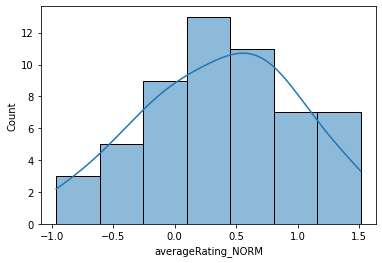

In [ ]:
sns.histplot(data=juntaTD.loc[juntaTD.main_country=='Australia'], x='averageRating_NORM', kde=True)

In [ ]:
stats.shapiro(juntaTD[juntaTD['main_country'] == 'Australia']['averageRating_NORM'])

(0.9793302416801453, 0.45978692173957825)

> Com este p-value podemos considerar tal distribuição como uma normal

Como a nota de filmes da Austrália segue uma distribuição normal vamos utilizar o one sample t-test, indicado na tabela para o nosso tipo de dado e nosso objetivo.

In [ ]:
stats.ttest_1samp(juntaTD[juntaTD['main_country'] == 'Australia']['averageRating_NORM'], juntaTD1['averageRating_NORM'].mean())

Ttest_1sampResult(statistic=3.867758040006332, pvalue=0.0002975520760896018)

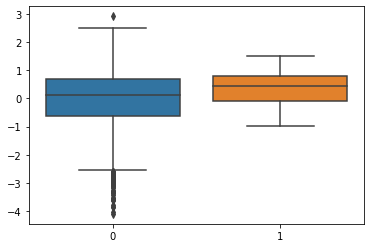

In [ ]:
dataA = juntaTD.loc[juntaTD.main_country == 'Australia',['averageRating_NORM']]
dataM = juntaTD['averageRating_NORM']
sns.boxplot(data=[dataM, dataA])

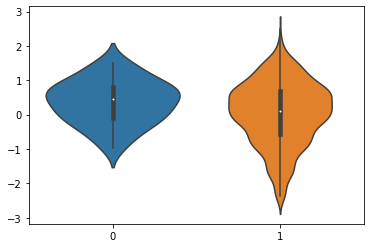

In [ ]:
dataA = juntaTD.loc[juntaTD.main_country == 'Australia',['averageRating_NORM']]
dataM = juntaTD1['averageRating_NORM']
sns.violinplot(data=[dataA, dataM])

> Conforme podemos ver nos gráficos plotados e no p-value resultante do one sample t test, que a média das distribuições são diferentes

## Vamos comparar agora se existe alguma diferença na avaliação média entre séries e filmes

### Antes precisamos verificar para séries e filmes se suas distribuições seguem uma normal

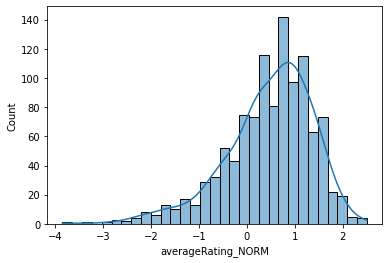

In [ ]:
sns.histplot(data=juntaTD.loc[juntaTD.type=='TV Show'], x='averageRating_NORM', kde=True)

In [ ]:
stats.shapiro(juntaTD.loc[juntaTD.type=='TV Show']['averageRating_NORM'])

(0.9555766582489014, 6.246571441750865e-18)

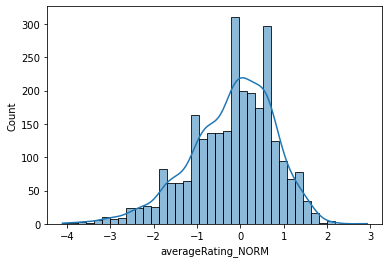

In [ ]:
sns.histplot(data=juntaTD.loc[juntaTD.type=='Movie'], x='averageRating_NORM', kde=True)

In [ ]:
stats.shapiro(juntaTD1.loc[juntaTD.type=='Movie']['averageRating_NORM'])

(0.9859991669654846, 1.4573036686085523e-15)

### Como podemos ver nenhuma das distribuições seguem uma normal, e os grupos não são pareados, assim utilizaremos o Mann-Whitney test para comparar as duas distribuições.

In [ ]:
ttest,pval = stats.mannwhitneyu(juntaTD.loc[juntaTD.type=='TV Show']['averageRating_NORM'],juntaTD.loc[juntaTD.type=='Movie']['averageRating_NORM'])
print("p-value",pval)
if pval <0.05:
  print("Temos que a hipótese nula foi rejeitada")
else:
  print("A hipótese nula é aceita")

p-value 1.0229334983857813e-85
Temos que a hipótese nula foi rejeitada


* Plotando dois gráficos com as distribuições para facilitar a visualização

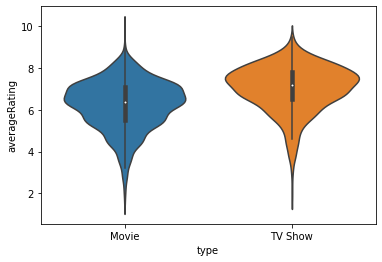

In [ ]:
sns.violinplot(data=juntaTD, x='type', y='averageRating')

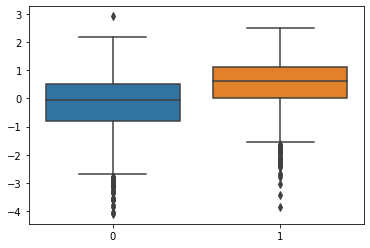

In [ ]:
dataA = juntaTD.loc[juntaTD.type == 'TV Show',['averageRating_NORM']]
dataM = juntaTD[juntaTD['type'] == 'Movie']['averageRating_NORM']
sns.boxplot(data=[dataM, dataA])

# Projeto 2

##Vamos utilizar como rótulo as notas dos filmes, discretizá-las e tentar classificar os filmes de acordo com o score.

#### Antes iremos organizar melhor nosso dataset excluindo algumas colunas, preprocessando a descrição e definindo os gêneros dos filmes

In [ ]:
juntaTD = juntaTD.reset_index()

In [ ]:
juntaTD.head(10)

,index,averageRating,numVotes,primaryTitle,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,main_country,year_added,averageRating_NORM
0,2779,6.4,80210,Kate & Leopold,s3315,Movie,Kate & Leopold,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",United States,2020-01-01,2001,PG-13,118,"Comedies, Romantic Movies",A present-day woman takes responsibility for g...,United States,2020,-0.055475
1,2822,6.7,2093,San Pietro,s5372,Movie,San Pietro,John Huston,desconhecido,United States,2017-03-31,1945,TV-14,32,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley...",United States,2017,0.192097
2,2869,6.7,546,Tunisian Victory,s7269,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom",2017-03-31,1944,TV-14,76,"Classic Movies, Documentaries",British and American troops join forces to lib...,United States,2017,0.192097
3,3629,6.5,1371,The Sign of Venus,s6869,Movie,The Sign of Venus,Dino Risi,"Sophia Loren, Franca Valeri, Vittorio De Sica,...",Italy,2020-11-13,1955,TV-14,97,"Classic Movies, Comedies, Independent Movies","While suitors swoon over her cousin, a single ...",Italy,2020,0.027049
4,3867,6.4,96,This Is My Love,s7050,TV Show,This Is My Love,desconhecido,"Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Su...",South Korea,2017-05-22,2015,TV-14,1,"International TV Shows, Korean TV Shows, Roman...",A renowned actor who is still pining over the ...,South Korea,2017,-0.055475
5,3981,6.5,2121,Scandal in Sorrento,s5426,Movie,Scandal in Sorrento,Dino Risi,"Vittorio De Sica, Sophia Loren, Lea Padovani, ...","Italy, France",2020-11-13,1955,TV-PG,93,"Classic Movies, Comedies, Independent Movies","When a marshal moves back to his hometown, he ...",Italy,2020,0.027049
6,3990,7.6,3807,Cairo Station,s1170,Movie,Cairo Station,Youssef Chahine,"Farid Shawqy, Hind Rostom, Youssef Chahine, Ha...",Egypt,2020-06-18,1958,TV-14,73,"Classic Movies, Dramas, International Movies",A Cairo newsstand vendor's fantasies morph int...,Egypt,2020,0.934810
7,4166,8.3,12805,The Andy Griffith Show,s6083,TV Show,The Andy Griffith Show,desconhecido,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,2017-07-01,1967,TV-G,8,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...,United States,2017,1.512476
8,4227,7.4,436,Jis Desh Men Ganga Behti Hai,s3188,Movie,Jis Desh Men Ganga Behti Hai,Radhu Karmakar,"Raj Kapoor, Padmini, Pran, Chanchal, Lalita Pa...",United States,2019-12-31,1960,TV-14,181,"Action & Adventure, Dramas, International Movies",Falling in with a band of outlaws during a hol...,United States,2019,0.769762
9,4671,7.5,8592,Diary of a Chambermaid,s1750,Movie,Diary of a Chambermaid,Benoît Jacquot,"Léa Seydoux, Vincent Lindon, Clotilde Mollet, ...","France, Belgium",2016-12-03,2015,NR,96,"Dramas, International Movies",An attractive young woman goes to work as a ch...,France,2016,0.852286


In [ ]:
juntaTD = juntaTD.drop(['index', 'primaryTitle', 'show_id', 'country', 'date_added', 'averageRating_NORM'], axis = 1)

In [ ]:
juntaTD

,averageRating,numVotes,type,title,director,cast,release_year,rating,duration,listed_in,description,main_country,year_added
0,6.4,80210,Movie,Kate & Leopold,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",2001,PG-13,118,"Comedies, Romantic Movies",A present-day woman takes responsibility for g...,United States,2020
1,6.7,2093,Movie,San Pietro,John Huston,desconhecido,1945,TV-14,32,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley...",United States,2017
2,6.7,546,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,1944,TV-14,76,"Classic Movies, Documentaries",British and American troops join forces to lib...,United States,2017
3,6.5,1371,Movie,The Sign of Venus,Dino Risi,"Sophia Loren, Franca Valeri, Vittorio De Sica,...",1955,TV-14,97,"Classic Movies, Comedies, Independent Movies","While suitors swoon over her cousin, a single ...",Italy,2020
4,6.4,96,TV Show,This Is My Love,desconhecido,"Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Su...",2015,TV-14,1,"International TV Shows, Korean TV Shows, Roman...",A renowned actor who is still pining over the ...,South Korea,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,3.9,8,TV Show,Cocomong,desconhecido,"Jung Sun-hye, Yang Jeong-hwa, Kim Jang, Ryoo J...",2015,TV-Y,2,"Kids' TV, Korean TV Shows",What's in your fridge? In sunny Refrigerator L...,United States,2019
3834,6.2,111,TV Show,Chip and Potato,desconhecido,"Abigail Oliver, Andrea Libman, Briana Buckmast...",2019,TV-Y,2,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",United Kingdom,2019
3835,5.1,12376,Movie,Coffee & Kareem,Michael Dowse,"Ed Helms, Taraji P. Henson, Terrence Little Ga...",2020,TV-MA,88,"Action & Adventure, Comedies",An inept Detroit cop must team up with his gir...,United States,2020
3836,6.6,35,TV Show,Flowering Heart,desconhecido,"Choi Da-in, Yang Se-na, Gim Chae-eun, Esther, ...",2016,TV-Y7,1,"Kids' TV, Korean TV Shows","An ordinary student, who forms an advice club ...",South Korea,2019


####Preprocessando nossa descrição dos filmes

In [ ]:

import pandas as pd # our main data management package
import matplotlib.pyplot as plt # our main display package
import string # used for preprocessing
import re # used for preprocessing
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# make all text lowercase
def text_lowercase(text):
    return text.lower()
# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text
# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text
# lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [ ]:
pp_text_train = [] # our preprocessed text column
for text_data in juntaTD['description']:
    pp_text_data = preprocessing(text_data)
    pp_text_train.append(pp_text_data)
juntaTD['pp_desc'] = pp_text_train # add the preprocessed text as a column

In [ ]:
juntaTD.head()

,averageRating,numVotes,type,title,director,cast,release_year,rating,duration,listed_in,description,main_country,year_added,pp_desc
0,6.4,80210,Movie,Kate & Leopold,James Mangold,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",2001,PG-13,118,"Comedies, Romantic Movies",A present-day woman takes responsibility for g...,United States,2020,presentday woman take responsibility guiding c...
1,6.7,2093,Movie,San Pietro,John Huston,desconhecido,1945,TV-14,32,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley...",United States,2017,ally invade italy liri valley town san pietro ...
2,6.7,546,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,1944,TV-14,76,"Classic Movies, Documentaries",British and American troops join forces to lib...,United States,2017,british american troop join force liberate naz...
3,6.5,1371,Movie,The Sign of Venus,Dino Risi,"Sophia Loren, Franca Valeri, Vittorio De Sica,...",1955,TV-14,97,"Classic Movies, Comedies, Independent Movies","While suitors swoon over her cousin, a single ...",Italy,2020,suitor swoon cousin single woman take initiati...
4,6.4,96,TV Show,This Is My Love,desconhecido,"Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Su...",2015,TV-14,1,"International TV Shows, Korean TV Shows, Roman...",A renowned actor who is still pining over the ...,South Korea,2017,renowned actor still pining loss first real lo...


In [ ]:
filmedf = juntaTD[juntaTD['type'] == 'Movie']

In [ ]:
filmedf = filmedf.reset_index()

In [ ]:
filmedf = filmedf.drop('index', axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(analyzer='word', tokenizer=word_tokenize)

In [ ]:
freq_words = vectorizer.fit_transform(filmedf.pp_desc)
type(freq_words)

scipy.sparse.csr.csr_matrix

In [ ]:
freq_words.shape

(2718, 9667)

In [ ]:
!pip install mlflow --quiet

#### Ajustando o gênero dos filmes e separando as nostas em boas:1, para aquelas maiores ou iguais a 7 e ruins:0 as demais

In [ ]:
filmedf['main_gender']=filmedf['listed_in'].apply(lambda x: x.split(",")[0])

In [ ]:
def converter(cluster):
    if cluster>=7:
        return 1
    else:
        return 0

In [ ]:
filmedf['averageRatingConverted'] = filmedf['averageRating'].apply(converter)
filmedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   averageRating           2718 non-null   float64 
 1   numVotes                2718 non-null   int64   
 2   type                    2718 non-null   category
 3   title                   2718 non-null   category
 4   director                2718 non-null   category
 5   cast                    2718 non-null   object  
 6   release_year            2718 non-null   int64   
 7   rating                  2718 non-null   category
 8   duration                2718 non-null   int64   
 9   listed_in               2718 non-null   category
 10  description             2718 non-null   object  
 11  main_country            2718 non-null   category
 12  year_added              2718 non-null   int64   
 13  pp_desc                 2718 non-null   object  
 14  main_gender             

In [ ]:
filmedf['average_dist'] = pd.qcut(filmedf['averageRating'],2)
filmedf['average_dist'].describe()


count             2718
unique               2
top       (1.499, 6.4]
freq              1427
Name: average_dist, dtype: object

In [ ]:
filmedf['average_dist'].value_counts()

(1.499, 6.4]    1427
(6.4, 10.0]     1291
Name: average_dist, dtype: int64

In [ ]:

filmedf['average_dist']=filmedf['average_dist'].astype('category')

In [ ]:
filmedf['average_dist'] = filmedf['average_dist'].cat.codes

In [ ]:
filmedfcl = filmedf.drop(['averageRating', 'cast', 'listed_in', 'description'], axis=1)

In [ ]:
filmedfcl['main_country']=filmedfcl['main_country'].astype('category')
filmedfcl['director']=filmedfcl['director'].astype('category')
filmedfcl['type']=filmedfcl['type'].astype('category')
filmedfcl['title']=filmedfcl['title'].astype('category')
filmedfcl['rating']=filmedfcl['rating'].astype('category')
filmedfcl['main_gender']=filmedfcl['main_gender'].astype('category')


In [ ]:

filmedfcl['main_country']=filmedfcl['main_country'].cat.codes
filmedfcl['director']=filmedfcl['director'].cat.codes
filmedfcl['type']=filmedfcl['type'].cat.codes
filmedfcl['title']=filmedfcl['title'].cat.codes
filmedfcl['rating']=filmedfcl['rating'].cat.codes
filmedfcl['main_gender']=filmedfcl['main_gender'].cat.codes


## Agora iremos separar nossos dados em treinamento, validação e teste

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

In [ ]:
X = filmedfcl.drop(['average_dist', 'pp_desc','averageRatingConverted'], axis=1)
y = filmedfcl['average_dist']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Rodando os algoritmos com o target sendo *average_dist*

### Primeiro utilizaremos o Decision Tree Classifier:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Analisando a árvore

In [ ]:
from sklearn.tree import plot_tree
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from sklearn.tree import export_graphviz
target_names = np.unique(y)
columns = X_train.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            feature_names = list(X.columns))

from subprocess import call

call(['dot', '-T', 'png', 'Movies.dot', '-o', 'tree_movies.png'])

2

[Text(373.3731563792509, 797.6739130434783, 'main_gender <= 5.5\ngini = 0.499\nsamples = 2038\nvalue = [1070, 968]'),
 Text(169.0880557789522, 762.2217391304348, 'duration <= 105.5\ngini = 0.46\nsamples = 857\nvalue = [550, 307]'),
 Text(46.290311925551464, 726.7695652173913, 'release_year <= 2006.5\ngini = 0.387\nsamples = 504\nvalue = [372, 132]'),
 Text(14.61672794117647, 691.3173913043478, 'rating <= 3.5\ngini = 0.5\nsamples = 66\nvalue = [32, 34]'),
 Text(8.205882352941176, 655.8652173913043, 'title <= 7668.0\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(6.154411764705882, 620.4130434782609, 'release_year <= 1984.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(4.102941176470588, 584.9608695652174, 'numVotes <= 33003.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(2.051470588235294, 549.5086956521739, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(6.154411764705882, 549.5086956521739, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(8.205882352941176, 584.

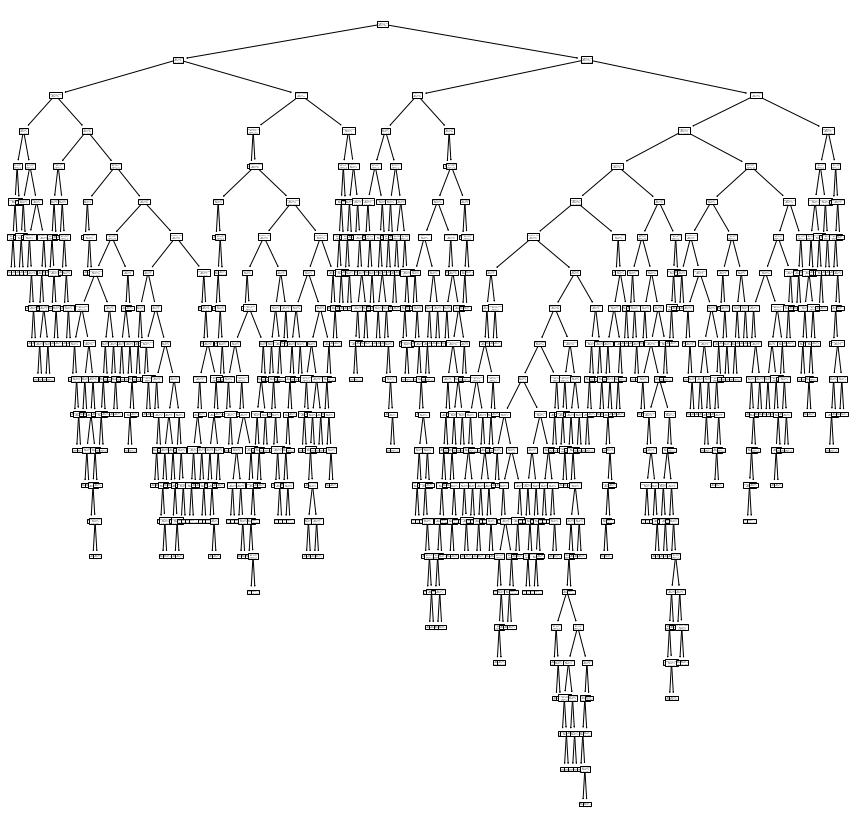

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize = (15,15))
plot_tree(tree, ax = ax, feature_names=X.columns)

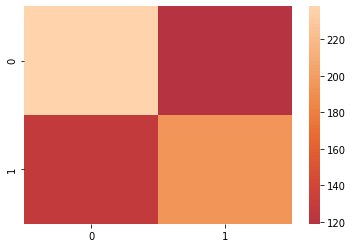

In [ ]:
predicted = tree.predict(X_test)

cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, center=True)
plt.show()

In [ ]:
report = classification_report(y_test, predicted)
print(report)


              precision    recall  f1-score   support

           0       0.65      0.67      0.66       357
           1       0.62      0.60      0.61       323

    accuracy                           0.64       680
   macro avg       0.64      0.64      0.64       680
weighted avg       0.64      0.64      0.64       680



#### Vamos utilizar o otimizador bayeseano para evitar o overfitting da nossa árvore

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import forest_minimize

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score
print(np.round(average_precision_score(y_test, predicted),4))
print(np.round(roc_auc_score(y_test, predicted),4))

0.5632
0.6352


In [ ]:
def tune_dtree(params):
    print(params)
    max_depth = params[0]
    min_samples_split = params[1]
    min_samples_leaf = params[2]
    max_features = params[3]
    criterion = params[4]

    tree = DecisionTreeClassifier(max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  max_features=max_features,
                                  criterion=criterion,
                                  random_state=42,
                                  class_weight='balanced')
    
    tree.fit(X_train,y_train)

    predicted = tree.predict(X_test)
    print('auc_score', roc_auc_score(y_test, predicted))
    print('average:',average_precision_score(y_test, predicted))
    report = classification_report(y_test, predicted)
    print(report)

    return -average_precision_score(y_test, predicted)


space = [(2,30),(5,30),(1,10),(1,7),('gini','entropy')]

result = forest_minimize(tune_dtree, space, random_state=42, n_random_starts=20,n_calls=50, verbose=1)

Iteration No: 1 started. Evaluating function at random point.
[21, 19, 8, 5, 'entropy']
auc_score 0.6309892378003832
average: 0.5596058247306892
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       357
           1       0.62      0.60      0.61       323

    accuracy                           0.63       680
   macro avg       0.63      0.63      0.63       680
weighted avg       0.63      0.63      0.63       680

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0284
Function value obtained: -0.5596
Current minimum: -0.5596
Iteration No: 2 started. Evaluating function at random point.
[27, 23, 7, 3, 'gini']
auc_score 0.5986289252543122
average: 0.5344399765511936
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       357
           1       0.57      0.60      0.59       323

    accuracy                           0.60       680
   macro avg       0.60      0.60  

In [ ]:
result.x

[8, 22, 10, 6, 'gini']

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       357
           1       0.68      0.67      0.67       323

    accuracy                           0.69       680
   macro avg       0.69      0.69      0.69       680
weighted avg       0.69      0.69      0.69       680



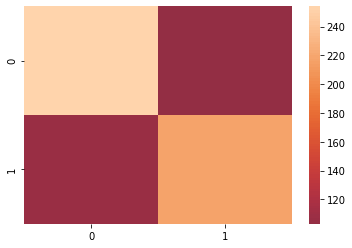

In [ ]:
params = result.x
max_depth = params[0]
min_samples_split = params[1]
min_samples_leaf = params[2]
max_features = params[3]
criterion = params[4]

tree = DecisionTreeClassifier(max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  max_features=max_features,
                                  criterion=criterion,
                                  random_state=42,
                                  class_weight='balanced')
tree.fit(X_train,y_train)
predicted_tree = tree.predict(X_test)

report = classification_report(y_test, predicted_tree)
print(report)



cm = confusion_matrix(y_test, predicted_tree)
sns.heatmap(cm, center=True)
plt.show()


In [ ]:
target_names = np.unique(y)
columns = X_train.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            feature_names = list(X.columns))

from subprocess import call

call(['dot', '-T', 'png', 'Movies.dot', '-o', 'tree_movies.png'])

2

[Text(490.001898364486, 770.1, 'duration <= 117.5\ngini = 0.5\nsamples = 2038\nvalue = [1019.0, 1019.0]'),
 Text(262.29585280373834, 679.5, 'main_gender <= 5.5\ngini = 0.498\nsamples = 1603\nvalue = [851.389, 746.354]'),
 Text(86.04672897196262, 588.9, 'numVotes <= 13.5\ngini = 0.438\nsamples = 646\nvalue = [429.504, 205.274]'),
 Text(78.22429906542057, 498.3, 'gini = 0.243\nsamples = 13\nvalue = [1.905, 11.58]'),
 Text(93.86915887850468, 498.3, 'release_year <= 2007.5\ngini = 0.429\nsamples = 633\nvalue = [427.599, 193.694]'),
 Text(31.289719626168225, 407.7, 'main_gender <= 2.5\ngini = 0.492\nsamples = 87\nvalue = [38.093, 49.476]'),
 Text(15.644859813084112, 317.1, 'title <= 2469.5\ngini = 0.478\nsamples = 43\nvalue = [25.713, 16.843]'),
 Text(7.822429906542056, 226.5, 'gini = 0.179\nsamples = 11\nvalue = [9.523, 1.053]'),
 Text(23.46728971962617, 226.5, 'title <= 4507.0\ngini = 0.5\nsamples = 32\nvalue = [16.19, 15.79]'),
 Text(15.644859813084112, 135.89999999999998, 'gini = 0.152\

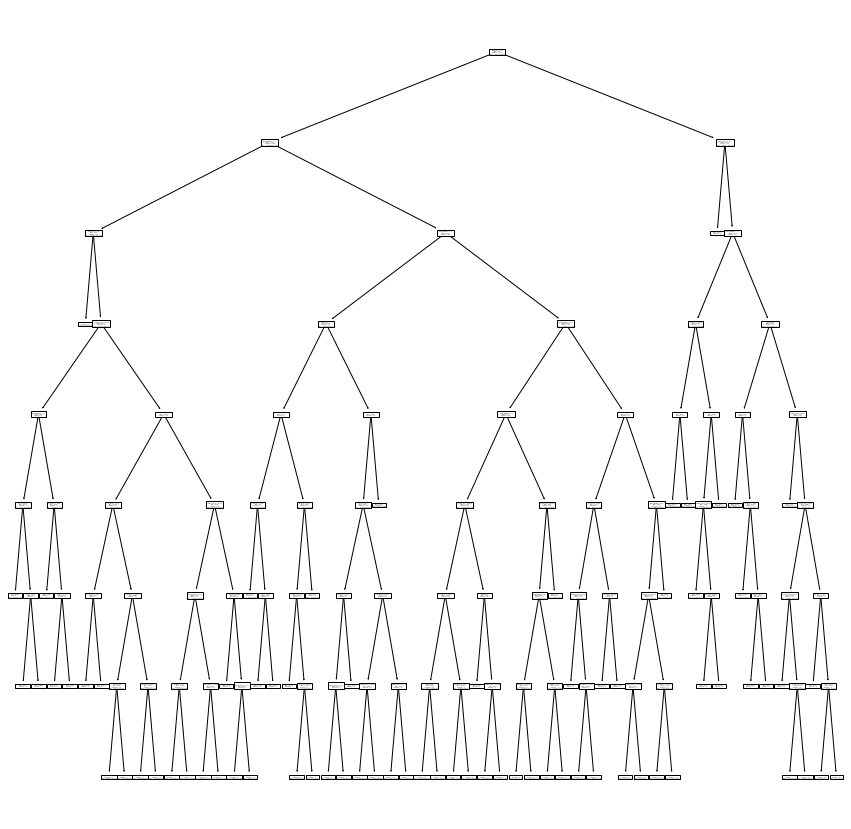

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize = (15,15))
plot_tree(tree, ax = ax, feature_names=X.columns)

### Agora vamos utilizar o Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)
ypred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print("ACC TRAINING:" + str(accuracy_score(y_train, ypred_train)))
print("ACC TEST:" + str(accuracy_score(y_test, y_model)))

ACC TRAINING:0.5559371933267909
ACC TEST:0.5720588235294117


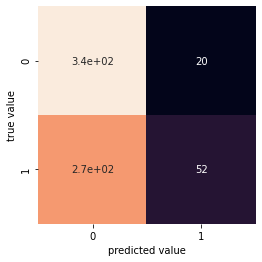

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

### Utilizando KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
model.fit(X, y)
y_model = model.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [ ]:
# criação do holdout: divide em treinamento e teste
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# criação do modelo sobre o conjunto de treinamento
model.fit(X1, y1)

# avaliação do modelo no conjunto de teste
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.5334805003679176

In [ ]:
y1_model = model.fit(X1, y1).predict(X1)
y2_model = model.fit(X1, y1).predict(X2)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(1.0, 0.5334805003679176)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.52205882, 0.54779412, 0.49264706, 0.49539595, 0.5359116 ])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# varia o k de 1 a 30
k_range = range(1, 31)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5184081289342305, 0.5117769155632732, 0.5154466029954418, 0.523186184067723, 0.5220737464727587, 0.5294416105925766, 0.525014922943347, 0.5194947905361407, 0.531260853049707, 0.5231780442804428, 0.5213384523551119, 0.5298065443889733, 0.5334830149772086, 0.5367864119817669, 0.5319947905361406, 0.5349359670067289, 0.5356685478619492, 0.53088777946603, 0.5286764705882353, 0.5283196765791187, 0.5279411764705882, 0.5382583568482744, 0.5253825700021706, 0.5312635663121337, 0.5272235185587151, 0.533473518558715, 0.5404655958324288, 0.5375284892554808, 0.5412076731061428, 0.5426741914477968]


Text(0, 0.5, 'Cross-Validated Accuracy')

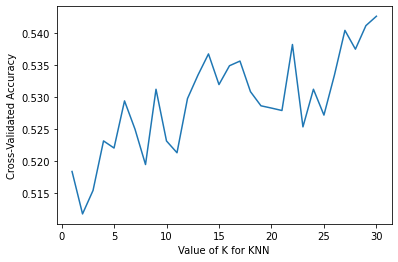

In [ ]:

# plotando o valor de K versus a acurácia no cross-validation
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
#desempenho no treinamento e teste
model = KNeighborsClassifier(n_neighbors=31)
y1_model = model.fit(X1, y1).predict(X1)
y2_model = model.fit(X1, y1).predict(X2)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.6026490066225165, 0.543046357615894)

### Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
ypred_train = model.predict(X_train)

In [ ]:

from sklearn.metrics import accuracy_score
print("ACC TRAINING:" + str(accuracy_score(y_train, ypred_train)))
print("ACC TEST:" + str(accuracy_score(y_test, ypred)))

ACC TRAINING:1.0
ACC TEST:0.6970588235294117


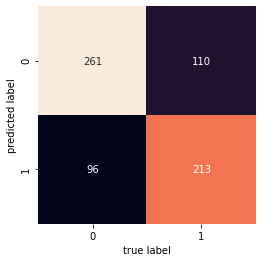

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Vamos agora utilizar como atributo target *averageRatingConverted*

In [ ]:
X = filmedfcl.drop(['average_dist', 'pp_desc','averageRatingConverted'], axis=1)
y = filmedfcl['averageRatingConverted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Primeiro utilizaremos o Decision Tree Classifier:

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Analisando a árvore antes de otimizar

In [ ]:
target_names = np.unique(y)
columns = X_train.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            feature_names = list(X.columns))

from subprocess import call

call(['dot', '-T', 'png', 'Movies.dot', '-o', 'tree_movies.png'])

2

[Text(358.9448141510954, 795.9857142857143, 'main_gender <= 5.5\ngini = 0.419\nsamples = 2038\nvalue = [1429, 609]'),
 Text(145.9395480486009, 757.1571428571428, 'duration <= 117.5\ngini = 0.315\nsamples = 857\nvalue = [689, 168]'),
 Text(34.51546391752578, 718.3285714285714, 'numVotes <= 348488.5\ngini = 0.246\nsamples = 646\nvalue = [553, 93]'),
 Text(32.0500736377025, 679.5, 'numVotes <= 15.5\ngini = 0.235\nsamples = 640\nvalue = [553, 87]'),
 Text(4.930780559646539, 640.6714285714286, 'main_country <= 33.0\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(2.4653902798232696, 601.8428571428572, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(7.396170839469809, 601.8428571428572, 'release_year <= 2018.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(4.930780559646539, 563.0142857142857, 'release_year <= 2002.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(2.4653902798232696, 524.1857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(7.396170839469809, 524.18

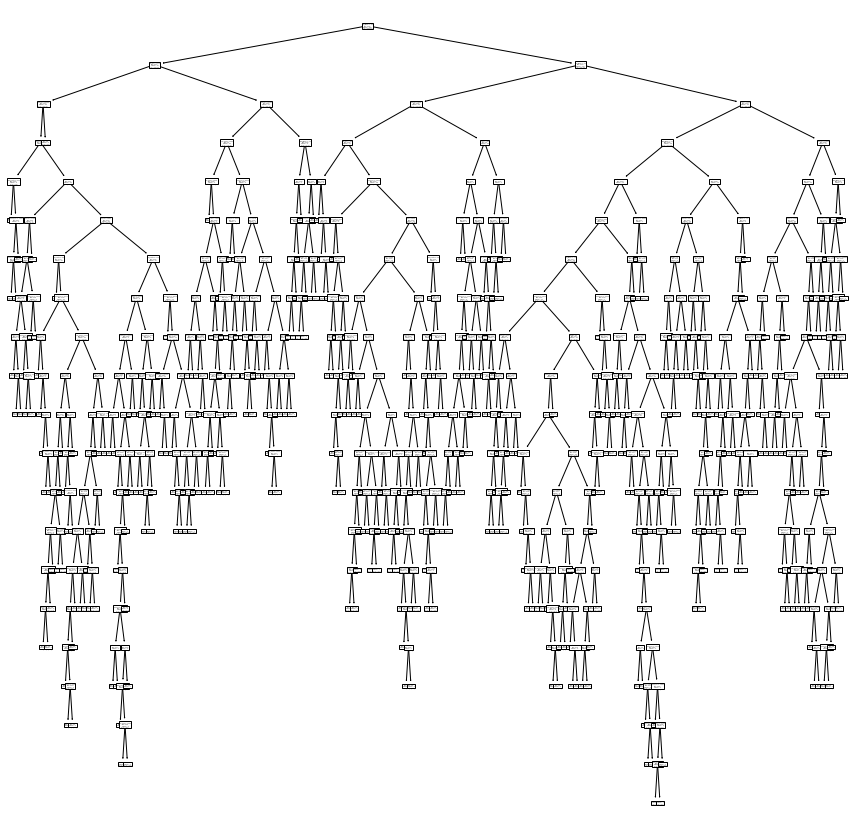

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize = (15,15))
plot_tree(tree, ax = ax, feature_names=X.columns)

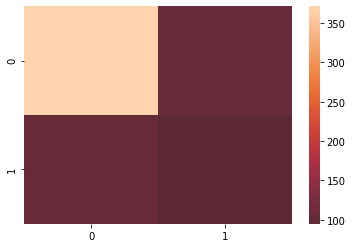

In [ ]:
predicted = tree.predict(X_test)

cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, center=True)
plt.show()

In [ ]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       479
           1       0.47      0.47      0.47       201

    accuracy                           0.69       680
   macro avg       0.62      0.62      0.62       680
weighted avg       0.69      0.69      0.69       680



In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score
print(np.round(average_precision_score(y_test, predicted),4))
print(np.round(roc_auc_score(y_test, predicted),4))

0.3771
0.6236


#### Otimizando

In [ ]:
def tune_dtree(params):
    print(params)
    max_depth = params[0]
    min_samples_split = params[1]
    min_samples_leaf = params[2]
    max_features = params[3]
    criterion = params[4]

    tree = DecisionTreeClassifier(max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  max_features=max_features,
                                  criterion=criterion,
                                  random_state=42,
                                  class_weight='balanced')
    
    tree.fit(X_train,y_train)

    predicted = tree.predict(X_test)
    print('auc_score', roc_auc_score(y_test, predicted))
    print('average:',average_precision_score(y_test, predicted))
    report = classification_report(y_test, predicted)
    print(report)

    return -average_precision_score(y_test, predicted)


space = [(2,30),(5,30),(1,10),(1,7),('gini','entropy')]

result = forest_minimize(tune_dtree, space, random_state=42, n_random_starts=20,n_calls=50, verbose=1)

Iteration No: 1 started. Evaluating function at random point.
[21, 19, 8, 5, 'entropy']
auc_score 0.6290727988450233
average: 0.3710581081520502
              precision    recall  f1-score   support

           0       0.80      0.63      0.70       479
           1       0.42      0.63      0.50       201

    accuracy                           0.63       680
   macro avg       0.61      0.63      0.60       680
weighted avg       0.69      0.63      0.64       680

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0250
Function value obtained: -0.3711
Current minimum: -0.3711
Iteration No: 2 started. Evaluating function at random point.
[27, 23, 7, 3, 'gini']
auc_score 0.6081284599964686
average: 0.3562161159576894
              precision    recall  f1-score   support

           0       0.78      0.62      0.70       479
           1       0.40      0.59      0.48       201

    accuracy                           0.61       680
   macro avg       0.59      0.61  

In [ ]:
result.x

[22, 8, 8, 3, 'gini']

#### Observando nossa árvore

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       479
           1       0.45      0.65      0.53       201

    accuracy                           0.66       680
   macro avg       0.64      0.66      0.63       680
weighted avg       0.71      0.66      0.68       680



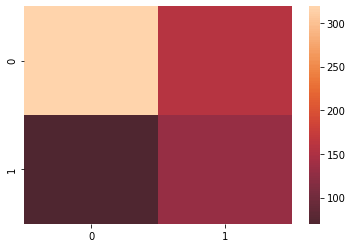

In [ ]:
params = result.x
max_depth = params[0]
min_samples_split = params[1]
min_samples_leaf = params[2]
max_features = params[3]
criterion = params[4]

tree = DecisionTreeClassifier(max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  max_features=max_features,
                                  criterion=criterion,
                                  random_state=42,
                                  class_weight='balanced')
tree.fit(X_train,y_train)
predicted_tree = tree.predict(X_test)

report = classification_report(y_test, predicted_tree)
print(report)



cm = confusion_matrix(y_test, predicted_tree)
sns.heatmap(cm, center=True)
plt.show()


Aqui podemos ver claramente um modelo viesado, para solucionar essa situação poderiamos utilizar SMOTE para podermos ter mais elementos do nosso target 1.

In [ ]:
target_names = np.unique(y)
columns = X_train.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            feature_names = list(X.columns))

from subprocess import call

call(['dot', '-T', 'png', 'Movies.dot', '-o', 'tree_movies.png'])

2

[Text(324.33182208755426, 792.75, 'release_year <= 2015.5\ngini = 0.5\nsamples = 2038\nvalue = [1019.0, 1019.0]'),
 Text(140.28229015918959, 747.45, 'rating <= 10.5\ngini = 0.49\nsamples = 769\nvalue = [350.838, 463.486]'),
 Text(113.10401591895804, 702.15, 'main_gender <= 5.5\ngini = 0.488\nsamples = 752\nvalue = [339.429, 461.813]'),
 Text(73.28292329956585, 656.85, 'director <= 2214.5\ngini = 0.493\nsamples = 382\nvalue = [203.943, 160.631]'),
 Text(47.240231548480466, 611.55, 'numVotes <= 26793.0\ngini = 0.455\nsamples = 182\nvalue = [105.537, 56.89]'),
 Text(26.648335745296674, 566.25, 'title <= 1640.0\ngini = 0.401\nsamples = 142\nvalue = [86.997, 33.465]'),
 Text(16.958031837916064, 520.95, 'release_year <= 2008.5\ngini = 0.127\nsamples = 33\nvalue = [22.819, 1.673]'),
 Text(12.11287988422576, 475.65, 'gini = 0.376\nsamples = 8\nvalue = [4.992, 1.673]'),
 Text(21.80318379160637, 475.65, 'gini = -0.0\nsamples = 25\nvalue = [17.827, 0.0]'),
 Text(36.33863965267728, 520.95, 'direct

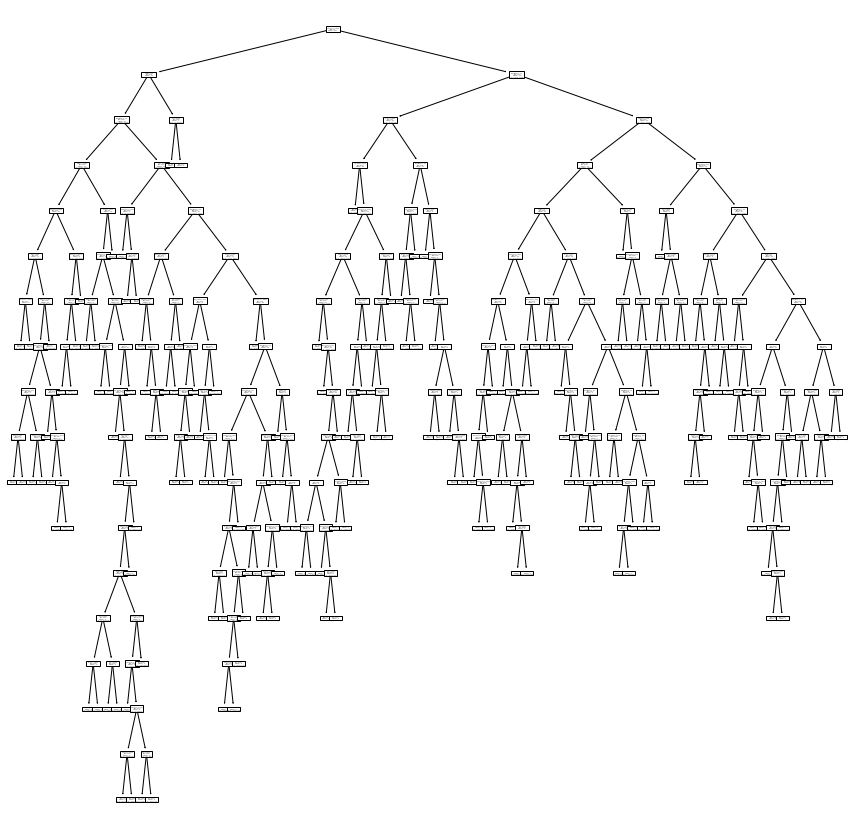

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize = (15,15))
plot_tree(tree, ax = ax, feature_names=X.columns)

Podemos ver que nossa árvore de decisão diminuiu consideravelmente de tamanho

### Agora vamos utilizar o Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)
ypred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print("ACC TRAINING:" + str(accuracy_score(y_train, ypred_train)))
print("ACC TEST:" + str(accuracy_score(y_test, y_model)))

ACC TRAINING:0.7051030421982336
ACC TEST:0.7132352941176471


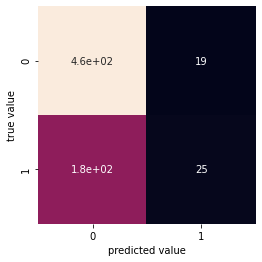

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

### Utilizando KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
model.fit(X, y)
y_model = model.predict(X)

In [ ]:

from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [ ]:
# criação do holdout: divide em treinamento e teste
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# criação do modelo sobre o conjunto de treinamento
model.fit(X1, y1)

# avaliação do modelo no conjunto de teste
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.5967623252391464

In [ ]:
y1_model = model.fit(X1, y1).predict(X1)
y2_model = model.fit(X1, y1).predict(X2)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(1.0, 0.5967623252391464)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.56985294, 0.61213235, 0.58088235, 0.58563536, 0.60773481])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# varia o k de 1 a 30
k_range = range(1, 31)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5912551551986107, 0.670721185153028, 0.6354026481441286, 0.6755060234425874, 0.6574791078793142, 0.676982038202735, 0.6648429021054916, 0.6824994573475147, 0.6710888322118516, 0.6824953874538745, 0.670352181462991, 0.6953698176687648, 0.6795487844584328, 0.6891143911439115, 0.6773483286303451, 0.6924259279357499, 0.6861718580421099, 0.6957347514651617, 0.688746744085088, 0.6957306815715216, 0.6942587367050141, 0.69867185804211, 0.6902132624267419, 0.6957306815715216, 0.6968322661167788, 0.7008804536574778, 0.6983055676144996, 0.702717332320382, 0.6997788691122205, 0.7030849793792056]


Text(0, 0.5, 'Cross-Validated Accuracy')

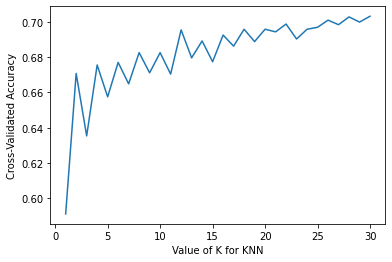

In [ ]:

# plotando o valor de K versus a acurácia no cross-validation
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
#desempenho no treinamento e teste
model = KNeighborsClassifier(n_neighbors=31)
y1_model = model.fit(X1, y1).predict(X1)
y2_model = model.fit(X1, y1).predict(X2)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.7100809418690214, 0.70345842531273)

### Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
ypred_train = model.predict(X_train)

In [ ]:

from sklearn.metrics import accuracy_score
print("ACC TRAINING:" + str(accuracy_score(y_train, ypred_train)))
print("ACC TEST:" + str(accuracy_score(y_test, ypred)))

ACC TRAINING:1.0
ACC TEST:0.7764705882352941


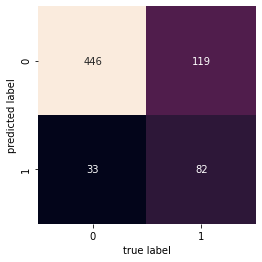

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Vamos tentar prever agora apenas com a descrição pré processada

In [ ]:
tf=TfidfVectorizer()
# the vectorizer must be fit onto the entire corpus
fitted_vectorizer = tf.fit(X)

In [ ]:
X = filmedfcl['pp_desc']
y = filmedfcl['averageRatingConverted']

In [ ]:
X_transform = fitted_vectorizer.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y)

In [ ]:

from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression # our model

In [ ]:
scikit_log_reg = LogisticRegression()
model=scikit_log_reg.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
y_train = model.predict(X_train)

In [ ]:
print("ACC TRAINING:" + str(accuracy_score(y_train, ypred_train)))
print("ACC TEST:" + str(accuracy_score(y_test, predictions)))

ACC TRAINING:0.7011776251226692
ACC TEST:0.6941176470588235


Podemos ver aqui um overfiting dos nossos modelos, como dos demais também.

### Testando Naive Bayes, dessa vez específicico para sentimentos.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)
ypred_train = model.predict(X_train)

In [ ]:
print("ACC TRAINING:" + str(accuracy_score(y_train, ypred_train)))
print("ACC TEST:" + str(accuracy_score(y_test, predictions)))

ACC TRAINING:1.0
ACC TEST:0.6941176470588235


### Montando um pipeline para poder comparar a acurácia das predições realizadas com relação aos algoritmos citados anteriormente e o SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import svm

In [ ]:
pipeline_CVN = Pipeline([('counts', CountVectorizer()),('classifier', MultinomialNB())])

In [ ]:
pipeline_TVL = Pipeline([('counts', TfidfVectorizer()),('classifier', LogisticRegression())])

In [ ]:
pipeline_TVN = Pipeline([('counts', TfidfVectorizer()),('classifier', MultinomialNB())])

In [ ]:
pipeline_CVL = Pipeline([('counts', CountVectorizer()),('classifier', LogisticRegression())])

In [ ]:
pipeline_CVSVM = Pipeline([('counts', CountVectorizer()),('classifier', svm.SVC(kernel='linear'))])

In [ ]:
pipeline_TVSVM = Pipeline([('counts', TfidfVectorizer()),('classifier', svm.SVC(kernel='linear'))])

In [ ]:
def Metricas(model, desc, classes):
    resultados = cross_val_predict(model, desc, classes, cv=10)
    print("ACC:" + str(accuracy_score(classes, resultados)))

In [ ]:
Metricas(pipeline_CVN, X, y)

ACC:0.6994113318616629


In [ ]:
Metricas(pipeline_CVL, X, y)

ACC:0.6784400294334069


In [ ]:
Metricas(pipeline_TVN, X, y)

ACC:0.7049300956585725


In [ ]:
Metricas(pipeline_TVL, X, y)

ACC:0.7045621780721119


In [ ]:
Metricas(pipeline_TVSVM, X, y)

ACC:0.7027225901398086


In [ ]:
Metricas(pipeline_CVSVM, X, y)

ACC:0.6504782928623988


## Vamos Adicionar o MLFlow ao treinamento dos modelos que que serão otimizados através do optuna para assim podermos fazer o rastreamento

In [ ]:
!pip install mlflow --quiet

import mlflow
import os
from getpass import getpass

os.environ['MLFLOW_TRACKING_USERNAME'] = input('Enter your DAGsHub username: ')
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('Enter your DAGsHub access token: ')
os.environ['MLFLOW_TRACKING_PROJECTNAME'] = input('Enter your DAGsHub project name: ')

mlflow.set_tracking_uri(f'https://dagshub.com/' + os.environ['MLFLOW_TRACKING_USERNAME'] + '/' + os.environ['MLFLOW_TRACKING_PROJECTNAME'] + '.mlflow')

with mlflow.start_run(run_name="MLflow on Colab"):
  mlflow.log_metric("m1", 2.0)
  mlflow.log_param("p1", "mlflow-colab")

Enter your DAGsHub username: icsea
Enter your DAGsHub access token: ··········
Enter your DAGsHub project name: projeto2


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_absolute_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2



In [ ]:
X = filmedfcl.drop(['average_dist', 'pp_desc','averageRatingConverted'], axis=1)
y = filmedfcl['averageRatingConverted']

In [ ]:
#teste
import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)



np.random.seed(40)

    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

max_depth = 5
min_samples_split = 5
max_features = 6

with mlflow.start_run():
    tree = DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_samples_split)
    tree.fit(X_train,y_train)

    predicted = tree.predict(X_test)
    print('auc_score', roc_auc_score(y_test, predicted))
    print('average:',average_precision_score(y_test, predicted))
    report = classification_report(y_test, predicted)
    print(report)

    (rmse, mae, r2) = eval_metrics(y_test, predicted)

    print("Decision Tree Classifier (max_depth=%f, min_samples_split=%f, max_features=%f):" % (max_depth, min_samples_split, max_features))
    print("  RMSE: %s" % rmse)
    print("  MAE: %s" % mae)
    print("  R2: %s" % r2)

    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("min_samples_split", min_samples_split)
    mlflow.log_param("max_features", max_features)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    mlflow.sklearn.log_model(tree, "model")

auc_score 0.6475451552259579
average: 0.4367076517037049
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       479
           1       0.68      0.37      0.48       201

    accuracy                           0.76       680
   macro avg       0.73      0.65      0.66       680
weighted avg       0.75      0.76      0.74       680

Decision Tree Classifier (max_depth=5.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.48809353009197637
  MAE: 0.23823529411764705
  R2: -0.14417474215560988


2021/08/17 02:55:43 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/8d64e6e4c2b24a58b08b95a98aacc4ca/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


In [ ]:
!pip install optuna --quiet

In [ ]:
import os

import optuna
from optuna.trial import TrialState

## Já útilizamos o otimizador bayeseano de scikit-optimize, agora vamos utilizar a ferramenta optuna para selecionarmos no máx 3 hiperparâmetros


> Primeiramente para o primeiro algoritmo Decision Tree Classifier

In [ ]:
def DecisionTreeOptuna(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100,500)

    
    with mlflow.start_run():
        tree = DecisionTreeClassifier(criterion =criterion, max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features)
        tree.fit(X_train,y_train)

        predicted = tree.predict(X_test)
        print('auc_score', roc_auc_score(y_test, predicted))
        print('average:',average_precision_score(y_test, predicted))
        report = classification_report(y_test, predicted)
        print(report)

        (rmse, mae, r2) = eval_metrics(y_test, predicted)

        print("Decision Tree Classifier (max_depth=%f, min_samples_split=%f, max_features=%f):" % (max_depth, min_samples_split, max_features))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("min_samples_split", min_samples_split)
        mlflow.log_param("max_features", max_features)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)
        mlflow.sklearn.log_model(tree, "model")
study = optuna.create_study(direction="maximize")
study.optimize(DecisionTreeOptuna, n_trials=15)

[I 2021-08-17 02:57:40,772] A new study created in memory with name: no-name-b8de8ff0-dc94-437e-a887-2d8545e9f576


auc_score 0.6286884990496371
average: 0.41524582967515367
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       479
           1       0.66      0.33      0.44       201

    accuracy                           0.75       680
   macro avg       0.71      0.63      0.64       680
weighted avg       0.74      0.75      0.72       680

Decision Tree Classifier (max_depth=5.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.4985272427507908
  MAE: 0.2485294117647059
  R2: -0.19361439150801285


2021/08/17 02:57:42 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/8a96c3c1fc534c64b032b1aab735ca9f/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:42,298] Trial 0 failed, because the value None could not be cast to float.


auc_score 0.6486357357263786
average: 0.4067231211670861
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       479
           1       0.53      0.47      0.50       201

    accuracy                           0.72       680
   macro avg       0.66      0.65      0.65       680
weighted avg       0.71      0.72      0.72       680

Decision Tree Classifier (max_depth=14.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5285941398709244
  MAE: 0.27941176470588236
  R2: -0.34193333956522154


2021/08/17 02:57:43 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/b9cefc83c264430891d289c1c82a6e12/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:43,783] Trial 1 failed, because the value None could not be cast to float.


auc_score 0.5
average: 0.29558823529411765
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       479
           1       0.00      0.00      0.00       201

    accuracy                           0.70       680
   macro avg       0.35      0.50      0.41       680
weighted avg       0.50      0.70      0.58       680

Decision Tree Classifier (max_depth=2.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5436802693625341
  MAE: 0.29558823529411765
  R2: -0.41962421711899767


2021/08/17 02:57:45 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/cb6767ac12464e89a6154d3772e58afe/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:45,290] Trial 2 failed, because the value None could not be cast to float.


auc_score 0.6511908100416497
average: 0.40260331618406975
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       479
           1       0.50      0.52      0.51       201

    accuracy                           0.71       680
   macro avg       0.65      0.65      0.65       680
weighted avg       0.71      0.71      0.71       680

Decision Tree Classifier (max_depth=16.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5423261445466404
  MAE: 0.29411764705882354
  R2: -0.4125614100686543


2021/08/17 02:57:46 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/0993fe50ea384a7585c39b392f6bc8e3/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:46,787] Trial 3 failed, because the value None could not be cast to float.


auc_score 0.652831874032759
average: 0.43036439937716
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       479
           1       0.63      0.41      0.49       201

    accuracy                           0.75       680
   macro avg       0.70      0.65      0.67       680
weighted avg       0.74      0.75      0.74       680

Decision Tree Classifier (max_depth=8.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.4970501217477084
  MAE: 0.24705882352941178
  R2: -0.1865515844576695


2021/08/17 02:57:48 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/9e7250d079e247f7a6a28e802c2ccfb6/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:48,229] Trial 4 failed, because the value None could not be cast to float.


auc_score 0.5566374806551793
average: 0.3428725110829296
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       479
           1       0.59      0.16      0.25       201

    accuracy                           0.72       680
   macro avg       0.66      0.56      0.54       680
weighted avg       0.69      0.72      0.66       680

Decision Tree Classifier (max_depth=3.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5299833515698172
  MAE: 0.28088235294117647
  R2: -0.3489961466155649


2021/08/17 02:57:49 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/09311f2367a34bcc8b19c13b7a468aa7/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:49,678] Trial 5 failed, because the value None could not be cast to float.


auc_score 0.6117221824073785
average: 0.37193041485072
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       479
           1       0.49      0.40      0.44       201

    accuracy                           0.70       680
   macro avg       0.63      0.61      0.62       680
weighted avg       0.68      0.70      0.69       680

Decision Tree Classifier (max_depth=14.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5504009233918382
  MAE: 0.3029411764705882
  R2: -0.45493825237071395


2021/08/17 02:57:51 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/19025c96ce884c6995999f7a43569609/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:51,195] Trial 6 failed, because the value None could not be cast to float.


auc_score 0.6193406661888885
average: 0.3768510389230319
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       479
           1       0.48      0.43      0.46       201

    accuracy                           0.70       680
   macro avg       0.63      0.62      0.62       680
weighted avg       0.69      0.70      0.69       680

Decision Tree Classifier (max_depth=14.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5517352306187111
  MAE: 0.3044117647058823
  R2: -0.4620010594210573


2021/08/17 02:57:52 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/43b75cbcd44044b4a34f2db54b93dfdd/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:52,658] Trial 7 failed, because the value None could not be cast to float.


auc_score 0.5
average: 0.29558823529411765
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       479
           1       0.00      0.00      0.00       201

    accuracy                           0.70       680
   macro avg       0.35      0.50      0.41       680
weighted avg       0.50      0.70      0.58       680

Decision Tree Classifier (max_depth=2.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5436802693625341
  MAE: 0.29558823529411765
  R2: -0.41962421711899767


2021/08/17 02:57:53 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/f3fd6afb934e410b8d7ead8e3ba7efa8/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:54,107] Trial 8 failed, because the value None could not be cast to float.


auc_score 0.5583252838105922
average: 0.3475733577012895
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       479
           1       0.63      0.15      0.25       201

    accuracy                           0.72       680
   macro avg       0.68      0.56      0.54       680
weighted avg       0.70      0.72      0.66       680

Decision Tree Classifier (max_depth=4.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5258047054138011
  MAE: 0.27647058823529413
  R2: -0.32780772546453507


2021/08/17 02:57:55 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/3c3fb1ec2dfa419e8024ba07079d6e6a/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:55,591] Trial 9 failed, because the value None could not be cast to float.


auc_score 0.640949739818652
average: 0.4113036173344029
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       479
           1       0.58      0.40      0.48       201

    accuracy                           0.74       680
   macro avg       0.68      0.64      0.65       680
weighted avg       0.72      0.74      0.72       680

Decision Tree Classifier (max_depth=8.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5116294615074009
  MAE: 0.26176470588235295
  R2: -0.2571796549611023


2021/08/17 02:57:56 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/cabb78a239244386958b6f9dfb57bd2b/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:57,143] Trial 10 failed, because the value None could not be cast to float.


auc_score 0.6614941991503859
average: 0.4355985907566241
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       479
           1       0.62      0.44      0.51       201

    accuracy                           0.75       680
   macro avg       0.70      0.66      0.67       680
weighted avg       0.74      0.75      0.74       680

Decision Tree Classifier (max_depth=8.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.4970501217477084
  MAE: 0.24705882352941178
  R2: -0.1865515844576695


2021/08/17 02:57:58 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/0765cbbe09174de281c3613a8f185561/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:57:58,671] Trial 11 failed, because the value None could not be cast to float.


auc_score 0.6157209775755876
average: 0.37089671083222286
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       479
           1       0.46      0.45      0.46       201

    accuracy                           0.68       680
   macro avg       0.62      0.62      0.62       680
weighted avg       0.68      0.68      0.68       680

Decision Tree Classifier (max_depth=25.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5636018619766345
  MAE: 0.3176470588235294
  R2: -0.5255663228741467


2021/08/17 02:58:00 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/fbefd0b6672a4b1bae3ce561fd10a59d/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:58:00,561] Trial 12 failed, because the value None could not be cast to float.


auc_score 0.6079882425035574
average: 0.39465378306824295
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       479
           1       0.65      0.28      0.39       201

    accuracy                           0.74       680
   macro avg       0.70      0.61      0.61       680
weighted avg       0.72      0.74      0.70       680

Decision Tree Classifier (max_depth=4.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5072996561958923
  MAE: 0.25735294117647056
  R2: -0.23599123381007248


2021/08/17 02:58:02 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/d2a065300dba41a89a0926cb8a906c27/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:58:02,186] Trial 13 failed, because the value None could not be cast to float.


auc_score 0.633331256037142
average: 0.40739788452694514
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       479
           1       0.60      0.37      0.46       201

    accuracy                           0.74       680
   macro avg       0.68      0.63      0.64       680
weighted avg       0.72      0.74      0.72       680

Decision Tree Classifier (max_depth=7.000000, min_samples_split=5.000000, max_features=6.000000):
  RMSE: 0.5101902759236585
  MAE: 0.26029411764705884
  R2: -0.25011684791075894


2021/08/17 02:58:03 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/247/26279f369b104dcc81e33d5fe929d093/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
[W 2021-08-17 02:58:03,685] Trial 14 failed, because the value None could not be cast to float.


> Agora para o Random Forest Classifier

In [ ]:
def RandomForestOptuna(trial):
    max_features = trial.suggest_int("max_features", 1, 10)
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100,500)

    with mlflow.start_run():
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
        rf.fit(X_train,y_train)

        predicted = rf.predict(X_test)
        print('auc_score', roc_auc_score(y_test, predicted))
        print('average:',average_precision_score(y_test, predicted))
        report = classification_report(y_test, predicted)
        print(report)

        (rmse, mae, r2) = eval_metrics(y_test, predicted)

        print("Random Forest Classifier (max_features=%f, max_depth=%f, n_estimators=%f):" % (max_features, max_depth, n_estimators))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("max_features", max_features)
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)
        mlflow.sklearn.log_model(rf, "model")
study = optuna.create_study(direction="maximize")
study.optimize(RandomForestOptuna, n_trials=15)

> Agora para o KNN

In [ ]:
def KNNOptuna(trial):
    n_jobs = trial.suggest_int("n_jobs", 1, 10)
    n_neighbors = trial.suggest_int("n_neighbors", 2, 32, log=True)
    algorithm = trial.suggest_categorical("algorithm", ['auto', 'ball_tree', 'kd_tree', 'brute'])


    with mlflow.start_run():
        model = KNeighborsClassifier(n_jobs=n_jobs, n_neighbors=n_neighbors, algorithm=algorithm)
        model.fit(X_train,y_train)

        predicted = model.predict(X_test)
        print('auc_score', roc_auc_score(y_test, predicted))
        print('average:',average_precision_score(y_test, predicted))
        report = classification_report(y_test, predicted)
        print(report)

        (rmse, mae, r2) = eval_metrics(y_test, predicted)

        print("Kneighbors Classifier (max_depth=%f, min_samples_split=%f, max_features=%f):" % (max_depth, min_samples_split, max_features))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("max_features", max_features)
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)
        mlflow.sklearn.log_model(model, "model")
study = optuna.create_study(direction="minimize")
study.optimize(KNNOptuna, n_trials=15)

Importando bibliotecas necessárias para o optuna

In [ ]:
X = filmedfcl.drop(['average_dist', 'pp_desc','averageRatingConverted'], axis=1)
y = filmedfcl['averageRatingConverted']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:



def objective(trial):

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100,500)

    
    score = cross_val_score(rf, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy




In [ ]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [ ]:
X = filmedfcl.drop(['average_dist', 'pp_desc','averageRatingConverted'], axis=1)
y = filmedfcl['averageRatingConverted']

In [ ]:
"""def objective(trial):

    model = define_model(trial).to(DEVICE)
    
    # Trial 1: Optimizer type
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    
    # Trial 2: Learning rate
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

    # Load the FashionMNIST dataset.
    train_loader, test_loader = get_dadataset()

    # Training of the model.
    for epoch in range(EPOCHS):
        train(model, train_loader, optimizer)

        # Validation of the model.
        accuracy = test(model, test_loader)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy"""

In [ ]:
"""study = optuna.study.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))"""